In [7]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp


In [8]:
def spline_quadratique(x_nodes, y_nodes, z0):
    n = len(x_nodes)
    z = np.zeros(n)
    z[0] = z0

    # Calcul des dérivées aux nœuds
    for i in range(1, n):
        dx = x_nodes[i] - x_nodes[i-1]
        dy = y_nodes[i] - y_nodes[i-1]
        z[i] = 2*(dy/dx) - z[i-1]

    # Évaluation spline sur un maillage par morceaux
    x_spline_plot = []
    y_spline = []

    for i in range(n-1):
        x_val = np.linspace(x_nodes[i], x_nodes[i+1], 100)
        dx = x_nodes[i+1] - x_nodes[i]
        a = 0.5*(z[i+1] - z[i])/dx
        Sx = a*(x_val - x_nodes[i])**2 + z[i]*(x_val - x_nodes[i]) + y_nodes[i]

        x_spline_plot.append(x_val)
        y_spline.append(Sx)

    # Concaténer tous les morceaux pour obtenir des vecteurs 1D
    x_spline_plot = np.concatenate(x_spline_plot)
    y_spline = np.concatenate(y_spline)

    return x_spline_plot, y_spline, z



# --- Exemple d'utilisation ---
x = sp.symbols('x')
f_sym = x**4 - 3*x
f_prime = sp.diff(f_sym, x)

x_nodes = np.array([0, 1.5, 2.5, 4, 5.5, 6.2, 7.0])
y_nodes = np.array([float(f_sym.subs(x, xi)) for xi in x_nodes])
z0 = float(f_prime.subs(x, x_nodes[0]))

x_plot_fine = np.linspace(x_nodes[0], x_nodes[-1], 500)
y_true = np.array([float(f_sym.subs(x, xi)) for xi in x_plot_fine])

# Calcul spline
x_spline_plot, y_spline, z = spline_quadratique(x_nodes, y_nodes, z0)



In [9]:
# Interpolation Lagrange
def lagrange_interpolation(x_points, y_points, x_eval):
    x_eval = np.asarray(x_eval)
    P_x = np.zeros_like(x_eval, dtype=float)
    n = len(x_points)
    for i in range(n):
        L_i = np.ones_like(x_eval, dtype=float)
        for j in range(n):
            if i != j:
                L_i *= (x_eval - x_points[j])/(x_points[i] - x_points[j])
        P_x += y_points[i]*L_i
    return P_x

y_lagrange = lagrange_interpolation(x_nodes, y_nodes, x_plot_fine)



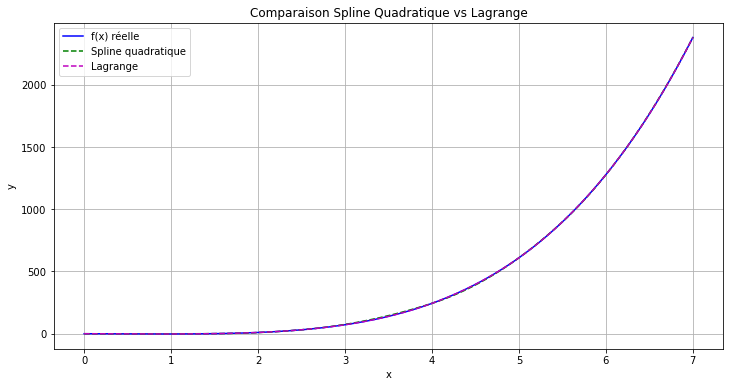

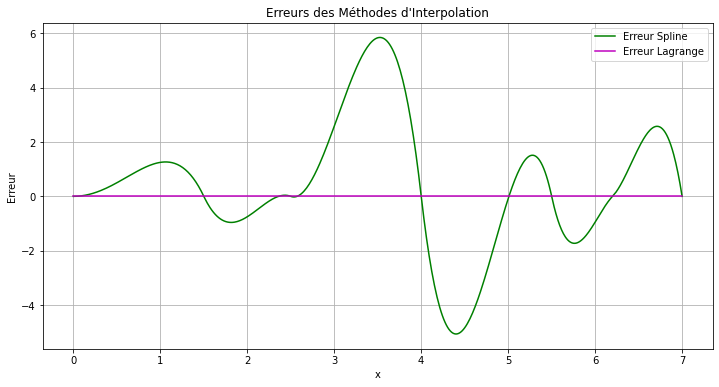


Coefficients Spline Quadratique:
Intervalle [0.00, 1.50]: a=2.2500, z_i=-3.0000, c_i=0.0000
Intervalle [1.50, 2.50]: a=27.2500, z_i=3.7500, c_i=0.5625
Intervalle [2.50, 4.00]: a=55.5833, z_i=58.2500, c_i=31.5625
Intervalle [4.00, 5.50]: a=140.9167, z_i=225.0000, c_i=244.0000
Intervalle [5.50, 6.20]: a=218.4614, z_i=647.7500, c_i=898.5625
Intervalle [6.20, 7.00]: a=247.0150, z_i=953.5960, c_i=1459.0336
Dérivée à x_n (z_n) = 1348.8200


In [11]:
# Tracé comparatif
plt.figure(figsize=(12,6))
plt.plot(x_plot_fine, y_true, 'b', label='f(x) réelle')
plt.plot(x_spline_plot, y_spline, 'g--', label='Spline quadratique')  # <- utiliser x_spline_plot
plt.plot(x_plot_fine, y_lagrange, 'm--', label='Lagrange')
plt.title("Comparaison Spline Quadratique vs Lagrange")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

# Tracé erreurs
plt.figure(figsize=(12,6))
plt.plot(x_spline_plot, y_spline - np.array([float(f_sym.subs(x, xi)) for xi in x_spline_plot]), 'g', label='Erreur Spline')
plt.plot(x_plot_fine, y_lagrange - y_true, 'm', label='Erreur Lagrange')
plt.title("Erreurs des Méthodes d'Interpolation")
plt.xlabel("x")
plt.ylabel("Erreur")
plt.legend()
plt.grid(True)
plt.show()

# Coefficients
print("\nCoefficients Spline Quadratique:")
for i in range(len(x_nodes)-1):
    dx = x_nodes[i+1] - x_nodes[i]
    a = 0.5*(z[i+1] - z[i])/dx
    print(f"Intervalle [{x_nodes[i]:.2f}, {x_nodes[i+1]:.2f}]: a={a:.4f}, z_i={z[i]:.4f}, c_i={y_nodes[i]:.4f}")
print(f"Dérivée à x_n (z_n) = {z[-1]:.4f}")
